In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score



In [6]:
data=pd.read_csv('data.csv')
# data.head()
data.info()
data.describe()

# n=data.isnull().sum()
# print(n)





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [7]:
data['Courier_Experience_yrs']=data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].mean())
data['Weather']=data['Weather'].fillna(data['Weather'].mode()[0])
data['Traffic_Level']=data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0])
data['Time_of_Day']=data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0])

# n=data.isnull().sum()
# print(n)

In [8]:
# data.to_csv("clean_data.csv")
df=pd.read_csv("clean_data.csv")
df.head()

,Unnamed: 0,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


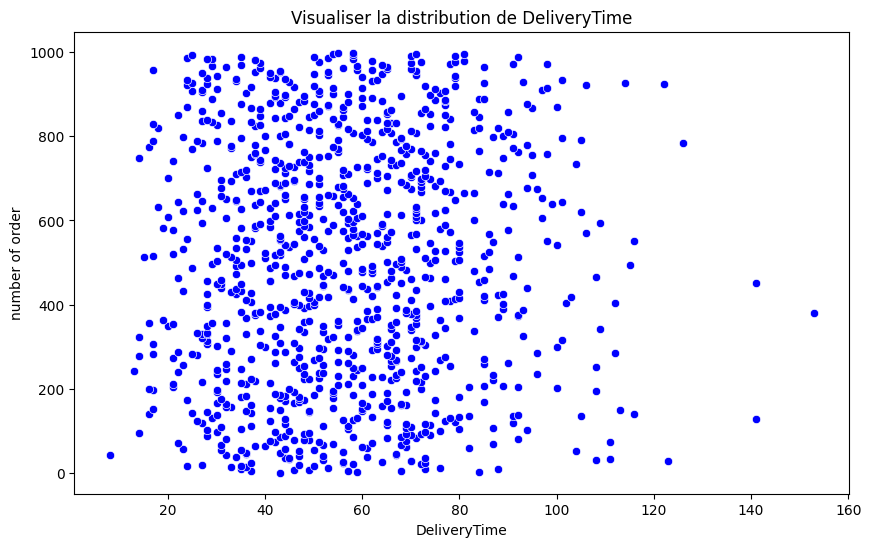

In [9]:
#Visualiser la distribution de DeliveryTime
data=pd.DataFrame(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delivery_Time_min',y=df.index,data=df, color="blue")
plt.title('Visualiser la distribution de DeliveryTime')
plt.xlabel('DeliveryTime')
plt.ylabel('number of order')
plt.show()


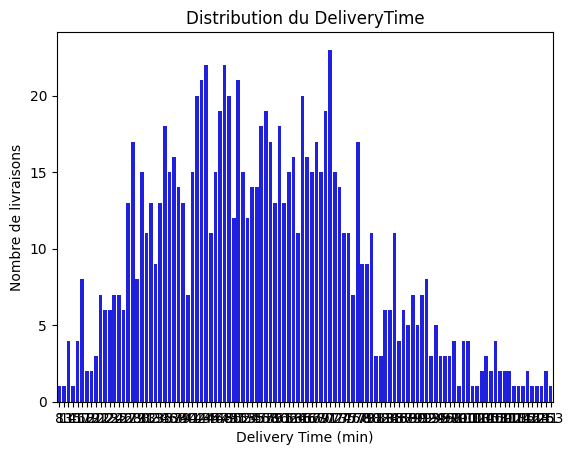

In [10]:
 
sns.barplot(
    x=df['Delivery_Time_min'].value_counts().index,
    y=df['Delivery_Time_min'].value_counts().values,
    color="blue"
)
plt.title('Distribution du DeliveryTime')
plt.xlabel('Delivery Time (min)')
plt.ylabel('Nombre de livraisons')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10080\3677987930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


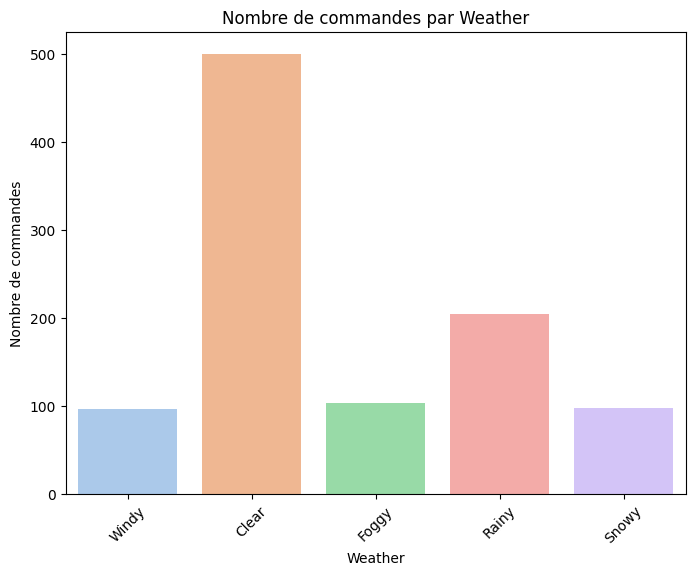

C:\Users\HP\AppData\Local\Temp\ipykernel_10080\3677987930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


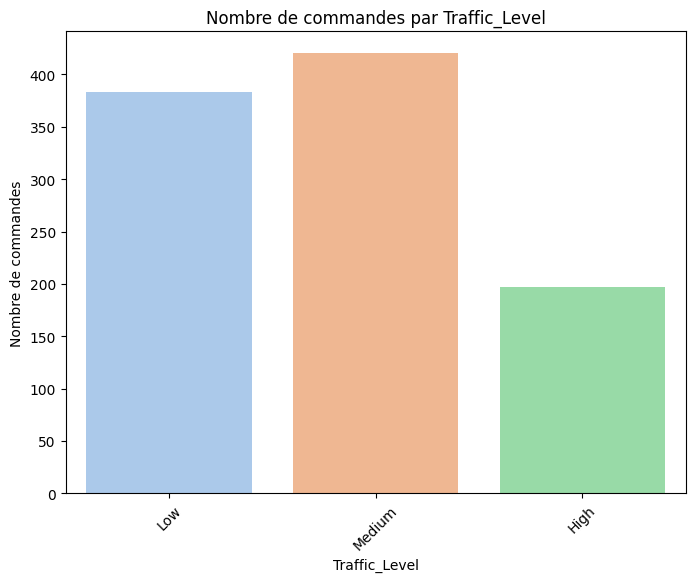

C:\Users\HP\AppData\Local\Temp\ipykernel_10080\3677987930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


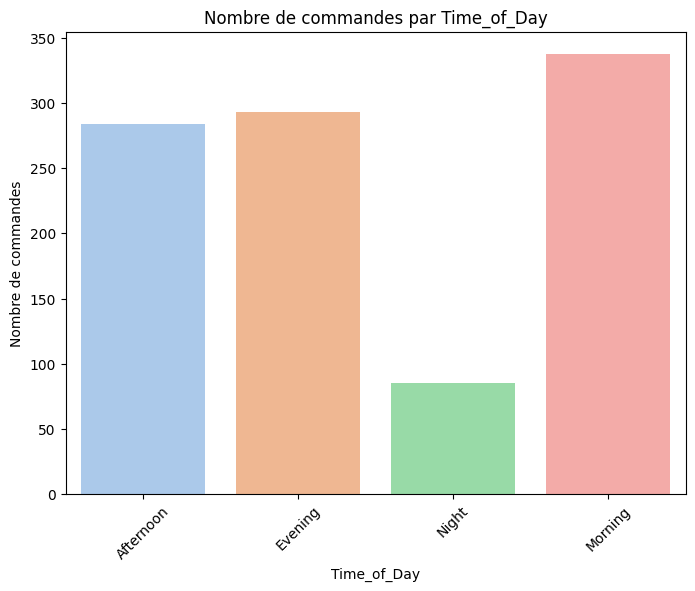

C:\Users\HP\AppData\Local\Temp\ipykernel_10080\3677987930.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel')


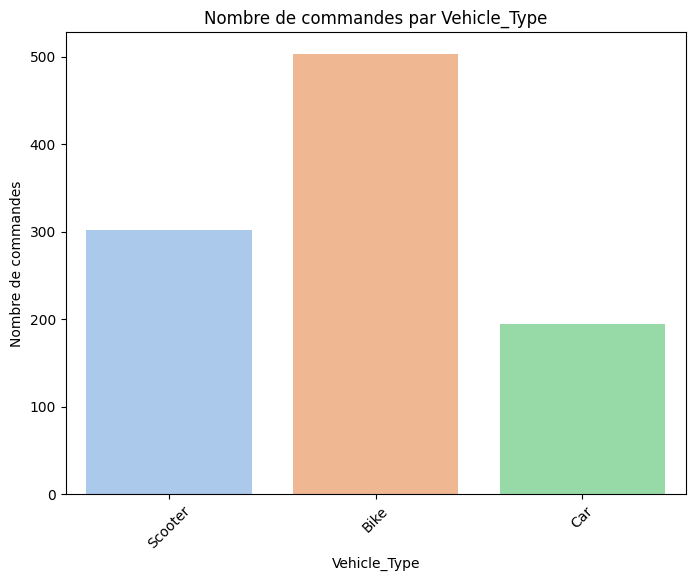

In [11]:
cols=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

for col in cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(f"Nombre de commandes par {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre de commandes")
    plt.xticks(rotation=45)
    plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_10080\3705210888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Delivery_Time_min", data=df, palette='pastel')


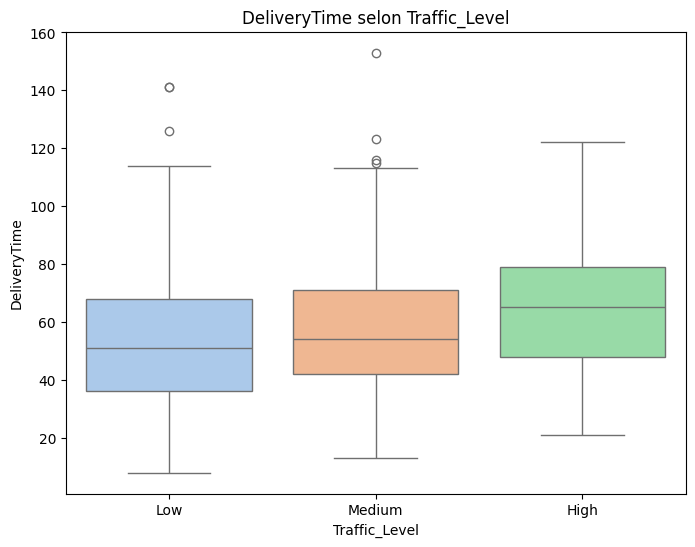

C:\Users\HP\AppData\Local\Temp\ipykernel_10080\3705210888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Delivery_Time_min", data=df, palette='pastel')


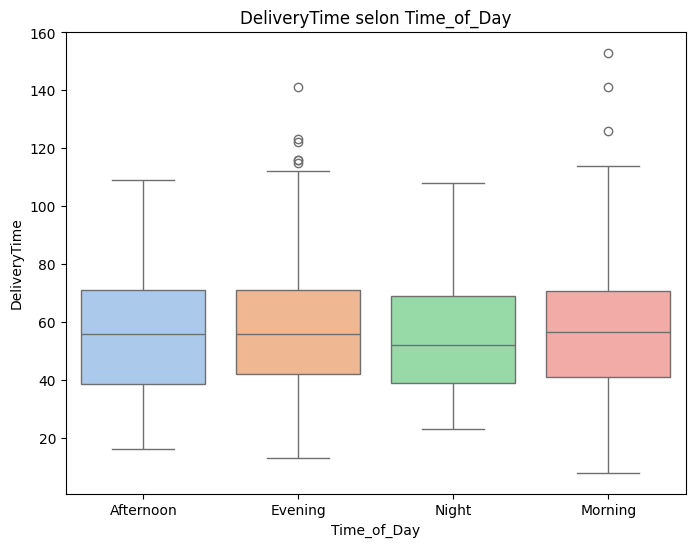

C:\Users\HP\AppData\Local\Temp\ipykernel_10080\3705210888.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y="Delivery_Time_min", data=df, palette='pastel')


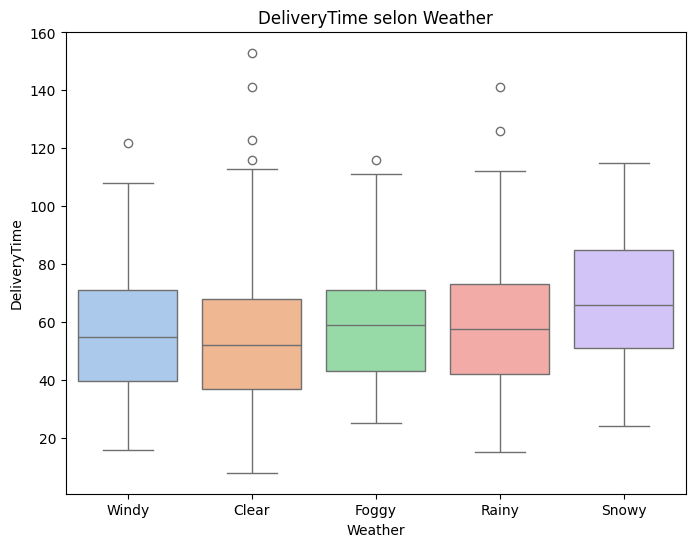

In [12]:
#boxplot
cols=["Traffic_Level","Time_of_Day","Weather"]
for col in cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=col, y="Delivery_Time_min", data=df, palette='pastel')
    plt.title(f"DeliveryTime selon {col}")
    plt.xlabel(col)
    plt.ylabel("DeliveryTime")
    plt.show()



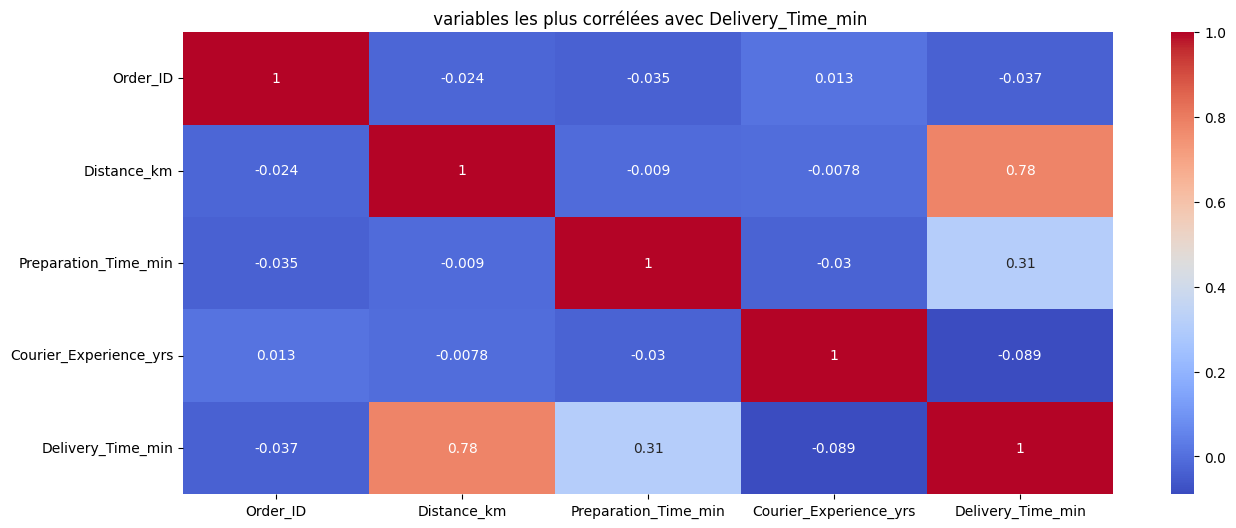

In [13]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    
df_num=df.select_dtypes(include=['number'])   
matrice_correlation = df_num.corr()

plt.figure(figsize=(15,6))
sns.heatmap(matrice_correlation,annot=True,cmap='coolwarm')
plt.title(' variables les plus corrélées avec Delivery_Time_min')
plt.show()


# plt.figure(figsize=(10,6))
# d=pd.DataFrame(df)
# sns.heatmap(d.corr(),annot=True,cmap='coolwarm')
# plt.title('Matrice Corrélation')
# plt.show()


In [14]:
#transformation des columns categoriels
cols_cat = ['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']

encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[cols_cat])

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cols_cat), index=df.index)




# cols=['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
# encoder=OneHotEncoder(sparse_output=False)
# encoded=encoder.fit_transform(df[cols])
# print(encoded)
# encoded_df=pd.DataFrame(
#    encoded,
#     columns=encoder.get_feature_names_out(cols),
#     index=df.index
# )

In [15]:
cols_num = [ "Courier_Experience_yrs", "Preparation_Time_min", "Distance_km"]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cols_num])
df_scaled = df.copy()
df_scaled[cols_num] = scaled_data

print(df_scaled)


     Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0         522    -0.374085   Windy           Low   Afternoon      Scooter   
1         738     1.117008   Clear        Medium     Evening         Bike   
2         741    -0.094835   Foggy           Low       Night      Scooter   
3         661    -0.460144   Rainy        Medium   Afternoon      Scooter   
4         412     1.575401   Clear           Low     Morning         Bike   
..        ...          ...     ...           ...         ...          ...   
995       107    -0.273977   Clear          High     Evening          Car   
996       271     1.092420   Rainy           Low     Morning      Scooter   
997       861     0.976505   Snowy          High     Evening      Scooter   
998       436     0.721842   Clear           Low   Afternoon         Bike   
999       103    -0.602404   Foggy           Low       Night      Scooter   

     Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0   

In [16]:
X=pd.concat([df_num.drop(columns=["Delivery_Time_min","Order_ID"]),encoded_df],axis=1)
y=df_scaled["Delivery_Time_min"]
selector = SelectKBest(score_func=f_regression, k=3)
X_new=selector.fit_transform(X,y)

selected_cols=X.columns[selector.get_support()]
print(list(selected_cols))

scores = pd.DataFrame({
    'Variable': X.columns,
    'F_Score': selector.scores_,
    'P_Value': selector.pvalues_
}).sort_values(by='F_Score', ascending=False)

print(scores)


['Distance_km', 'Preparation_Time_min', 'Traffic_Level_High']
                  Variable      F_Score        P_Value
0              Distance_km  1560.701668  2.976269e-206
1     Preparation_Time_min   104.109689   2.549879e-23
8       Traffic_Level_High    33.922521   7.729205e-09
3            Weather_Clear    27.025878   2.434604e-07
6            Weather_Snowy    24.320752   9.548257e-07
9        Traffic_Level_Low    19.201370   1.300707e-05
2   Courier_Experience_yrs     7.982364   4.817698e-03
5            Weather_Rainy     4.952621   2.627395e-02
4            Weather_Foggy     1.763352   1.845106e-01
16        Vehicle_Type_Car     1.071720   3.008080e-01
12     Time_of_Day_Evening     0.477319   4.897997e-01
14       Time_of_Day_Night     0.440489   5.070396e-01
17    Vehicle_Type_Scooter     0.417304   5.184338e-01
7            Weather_Windy     0.353421   5.523176e-01
11   Time_of_Day_Afternoon     0.344874   5.571621e-01
10    Traffic_Level_Medium     0.116126   7.333464e-01
13 

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

models= [
    {
        'model': RandomForestRegressor(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    {
        'model': SVR(),
        'param_grid': {
            'kernel': ['linear', 'rbf'],
            'C': [1, 10],
            'gamma': ['scale', 'auto']
        }
    }
]

result=[]

for m in models:
    grid_search=GridSearchCV(
        estimator=m['model'],
        param_grid=m['param_grid'],
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train,y_train)

    y_pred=grid_search.predict(X_test)

    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    print(f"_____{type(m['model']).__name__}_____")
    print(f"mae for : {mae}")
    print(f"r2 for : {r2}")

    print(f"meilleur hyperparametre for for : {grid_search.best_params_}")
    print(f"meilleur score R² for : {grid_search.best_score_}")

    r2_test=grid_search.score(X_test,y_test)
    print(f"R² sur le test set for : {r2_test}")
    
    result.append({
        'model_name':{type(m['model']).__name__},
        'mae':mae,
        'r2':r2
    })
    
best_model = min(result, key=lambda x: x['mae'])
print(f"D'apres les scores ,on constate que le meilleur modèle est {best_model['model_name']} avec MAE={best_model['mae']:.2f} et R²={best_model['r2']:.2f}")




_____RandomForestRegressor_____
mae for : 6.773339362893511
r2 for : 0.7930451130230558
meilleur hyperparametre for for : {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
meilleur score R² for : 0.7064370819577217
R² sur le test set for : 0.7930451130230558
_____SVR_____
mae for : 5.801231341932062
r2 for : 0.8230601365745509
meilleur hyperparametre for for : {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
meilleur score R² for : 0.7533656679674511
R² sur le test set for : 0.8230601365745509
D'apres les scores ,on constate que le meilleur modèle est {'SVR'} avec MAE=5.80 et R²=0.82


In [18]:
# Après avoir calculé best_model
with open("config.py", "w") as f:
    f.write(f"BEST_MODEL_NAME = '{best_model['model_name']}'\n")
    f.write(f"BEST_MODEL_MAE = {best_model['mae']}\n")
    f.write(f"BEST_MODEL_R2 = {best_model['r2']}\n")
